In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Načtení a spojení dat

In [265]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))
df = pd.concat([df, pd.read_parquet(os.path.join("data","cnb_ceska_poezie.parquet"))])

In [266]:
len(df)

64971

In [267]:
df

,rok,titul,autorstvo,autorstvo_kod,100_7
001,,,,,
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422,NaN
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049,NaN
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None,NaN
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969,NaN
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522,NaN
...,...,...,...,...,...
nkc20243627862,2024.0,Nějakým způsobem,Pospíšil Libor,NaN,jo2015866694
nkc20243627863,2024.0,Než nám dali jména...,Dlabal Milan Daniel,NaN,ola20241236036
nkc20243641181,2024.0,Vzpomínky ze šuplíku,Koudelka Petr,NaN,ola20241217490


In [268]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [269]:
autority = autority.merge(pd.read_json(os.path.join('data_raw','wikidata_raw.json')), left_index=True, right_index=True, how="outer")

In [270]:
autority

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni_presne,w_umrti_presne,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,ceny,jazykove_verze,popis_cs,wiki_cs,wiki_en,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role
aun1246107,None,None,None,None,[aun1246107],"[Balzac, Honoré de,]",[1799-1850.],[1],None,None,None,None,None,None,None,None,None,None,"[Balzac, Honoré de,]",[1799-1850.],None,[1],None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372164,None,None,None,None,[aun2006372164],"[Ibn Ezra, Abraham,]",[asi 1092-1167.],[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372165,None,None,None,None,[aun2006372165],"[Abu Jusuf Jakub ben Ibrachim al-Kufi,]",[731-798.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372166,None,None,None,None,[aun2006372166],"[Abū al-Fatḥ ibn-Abī al-Ḥasan,]",[činný 14. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372167,None,None,None,None,[aun2006372167],"[Abū Maʿšar,]",[787-886.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Významné dílo arabské astrologie. Po světě ší...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmp20241247833,[isni],[0000000078382767],[1952],None,[zmp20241247833],"[Dubin, Lois C.,]",[1952-],[1],None,None,None,"[Kanada, Spojené státy americké]",None,"[judaismus, dějiny Židů, haskala]",None,[historičky],[žena],[eng],None,None,None,None,None,None,None,None,None,None,None,None,[Kanadská historička zaměřená na moderní židov...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zmp20241247834,"[isni, wikidata]","[0000000385129542, Q87995574]",[1843],[1916],[zmp20241247834],"[Cohn, Jacob,]",[1843-1916],[1],None,None,None,"[Německo, Polsko]",None,"[judaismus, Židé, synagogy, židovská liturgie]",None,[rabíni],[muž],[ger],"[Cohn, Jakob,]",[1843-1916],None,[1],None,None,None,None,None,None,None,None,[Německý rabín působící v Katovicích (Polsko).],None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zmp20241247835,[wikidata],[Q105526319],[1933],[1944],[zmp20241247835],"[Koretzová, Margit,]",[1933-1944],[1],None,"[Plzeň, Česko]","[Osvětim, Polsko]","[Česko, Polsko]",None,"[výtvarné práce dětí a mládeže, holocaust (193...",None,[oběti nacismu],[žena],[cze],"[Koretz, Margit,]",[1933-1944],None,[1],None,None,N

In [271]:
df = df.merge(autority, left_on="autorstvo_kod", right_index=True, how="left")

In [272]:
len(df)

64971

In [273]:
def dva_letopocty(y, z):
    try:
        return int(re.search(r'\d{4}',str(y)).group(0))
    except:
        return z

In [274]:
df['narozeni'] = df.apply(lambda row: dva_letopocty(row['046_f'], row['w_narozeni']), axis=1)

In [275]:
df['umrti'] = df.apply(lambda row: dva_letopocty(row['046_g'], row['w_umrti']), axis=1)

In [276]:
df['vek'] = df['rok'] - df['narozeni']

Kolik lidí má uvedený věk:

In [278]:
len(df[df['vek'].notnull()]) / len(df)

0.6332209755121516

In [279]:
df = df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]

In [280]:
len(df[df['vek'].notnull()]) / len(df)

0.9975522500470722

In [281]:
def tri_gendery(gender_aut, gender_wikidata, aut):
    z = None
    if (str(gender_aut).split(" ")[0][-1] == 'á'):
        z = 'á'
    else:
        z = 'neá'
    if gender_wikidata != None:
        z = gender_wikidata
    try:
        for y in gender_aut:
            if y == 'muž':
                z = 'm'
            if y == 'žena':
                z = 'f'
    except:
        pass
    return z

In [282]:
df['w_gender'].dropna()

001
bknjje05009       Q6581097
cpk20041494224    Q6581097
nkc20051626328    Q6581097
bkneli05212       Q6581097
bknmik11570       Q6581097
                    ...   
nkc20243605631    Q6581072
nkc20243605628    Q6581097
nkc20243605623    Q6581097
nkc20243605622    Q6581097
nkc20243605621    Q6581072
Name: w_gender, Length: 34572, dtype: object

In [283]:
df['gender'] = df.apply(lambda row: tri_gendery(row['375_a'],row['w_gender'],row['autorstvo']), axis=1)

Kolik lidí má uvedený gender:

In [285]:
len(df[df['gender'].isin(['m','f'])]) / len(df)

0.44175162062565565

In [286]:
len(df[df['gender'].notnull()]) / len(df)

0.9669688248110391

In [287]:
df.groupby('gender').size()

gender
Q2449503        2
Q6581072     5483
Q6581097    13919
f            6056
m           10367
neá           122
dtype: int64

In [288]:
df[['autorstvo','375_a','gender','046_f','046_g','narozeni','umrti']].sample(20)

,autorstvo,375_a,gender,046_f,046_g,narozeni,umrti
001,,,,,,,
cpk20051526160,Svoboda František Jan,[muž],m,[1778],[1864],1778.0,1864.0
bknaus18379,Vlasák Rudolf,None,Q6581097,[1888],[1938],1888.0,1938.0
nkc20152719579,Kotleta František,[muž],m,[1981],None,1981.0,NaN
nkc20223423042,Pospíšilová Zuzana,[žena],f,[1975],None,1975.0,NaN
cpk19990739042,Bohatová Milena,None,Q6581072,[1965],None,1965.0,NaN
nkc20183004401,Pekárková Iva,[žena],f,[1963],None,1963.0,NaN
nkc20152734094,Smolíková Klára,None,Q6581072,[1974],None,1974.0,NaN
bk194700157,Vrba Jan,[muž],m,[1889],[1961],1889.0,1961.0
cpk20000816597,Dudek Adolf,[muž],m,[1964],None,1964.0,NaN


## Explorace: gender

<Axes: xlabel='rok'>

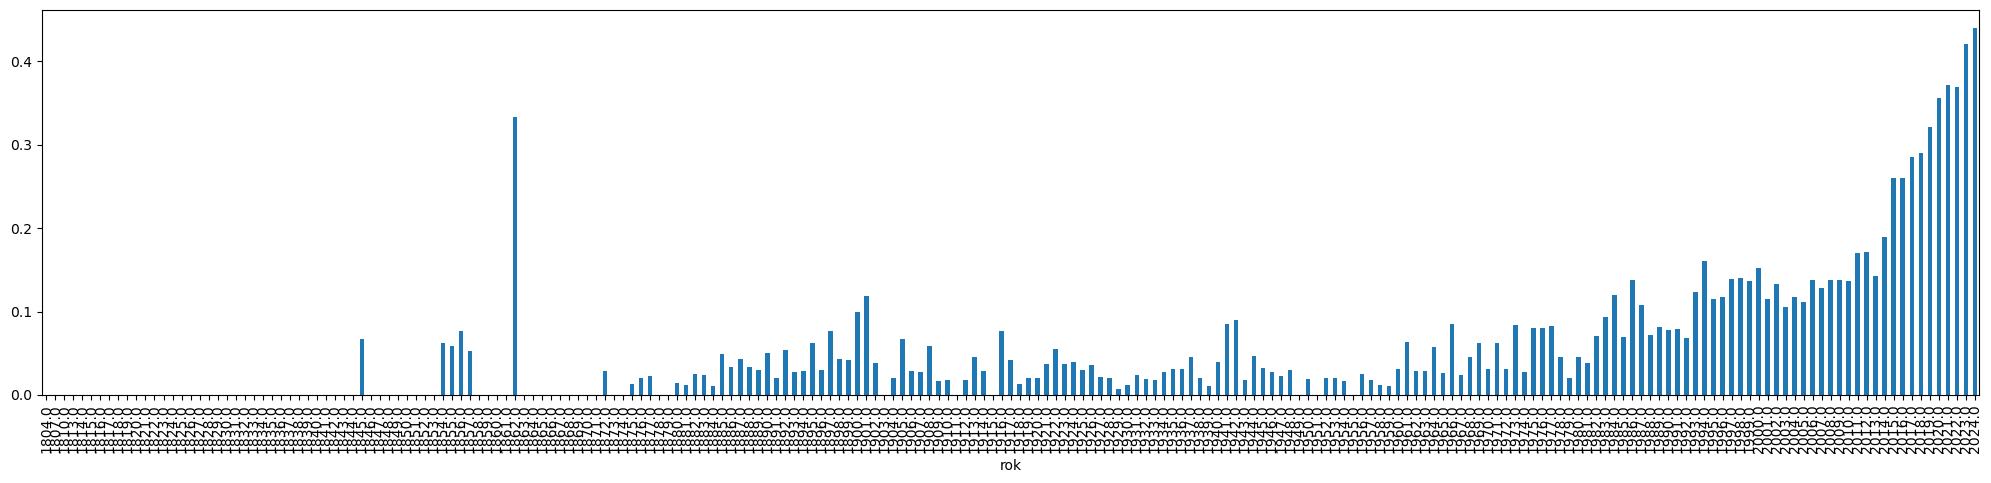

In [290]:
(df[df['gender'].isin(['á','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [291]:
kolikvyslo = df.groupby('rok').size()
kolikvyslo[kolikvyslo < 150].tail(1)

rok
1989.0    135
dtype: int64

In [292]:
(df[df['gender'].isin(['f','á'])].groupby('rok').size() / df[df['gender'].isin(['m','f','á','neá'])].groupby('rok').size()).tail(10)

rok
2015.0    0.424528
2016.0    0.398900
2017.0    0.448276
2018.0    0.441092
2019.0    0.467852
2020.0    0.500000
2021.0    0.516854
2022.0    0.502353
2023.0    0.551181
2024.0    0.546628
dtype: float64

In [293]:
df.groupby("rok").size()

rok
1804.0       2
1807.0       1
1810.0       1
1813.0       3
1814.0       4
1815.0       2
1816.0       2
1817.0       1
1818.0       2
1819.0       5
1820.0       3
1821.0       4
1822.0       2
1823.0       5
1824.0       9
1825.0      13
1826.0       2
1827.0       1
1828.0       3
1829.0       3
1830.0       8
1831.0       6
1832.0       2
1833.0       1
1834.0       6
1835.0       4
1836.0       5
1837.0       3
1838.0       6
1839.0       1
1840.0       4
1841.0       7
1842.0       6
1843.0      13
1844.0      28
1845.0      15
1846.0      12
1847.0      15
1848.0      12
1849.0      12
1850.0       9
1851.0       8
1852.0      16
1853.0      12
1854.0      16
1855.0      17
1856.0      13
1857.0      19
1858.0      18
1859.0      16
1860.0      16
1861.0      25
1862.0      24
1863.0      24
1864.0      16
1865.0      15
1866.0      14
1867.0       9
1868.0      17
1869.0      19
1870.0      19
1871.0      30
1872.0      35
1873.0      43
1874.0      72
1875.0      77
1876.0

In [294]:
(df[df['gender'] == 'f'].groupby('rok').size() / df[df['gender'].isin(['m','f'])].groupby('rok').size()).tail(10)

rok
2015.0    0.425868
2016.0    0.401107
2017.0    0.448276
2018.0    0.441727
2019.0    0.469136
2020.0    0.501982
2021.0    0.518148
2022.0    0.502945
2023.0    0.552632
2024.0    0.547414
dtype: float64

<Axes: xlabel='rok'>

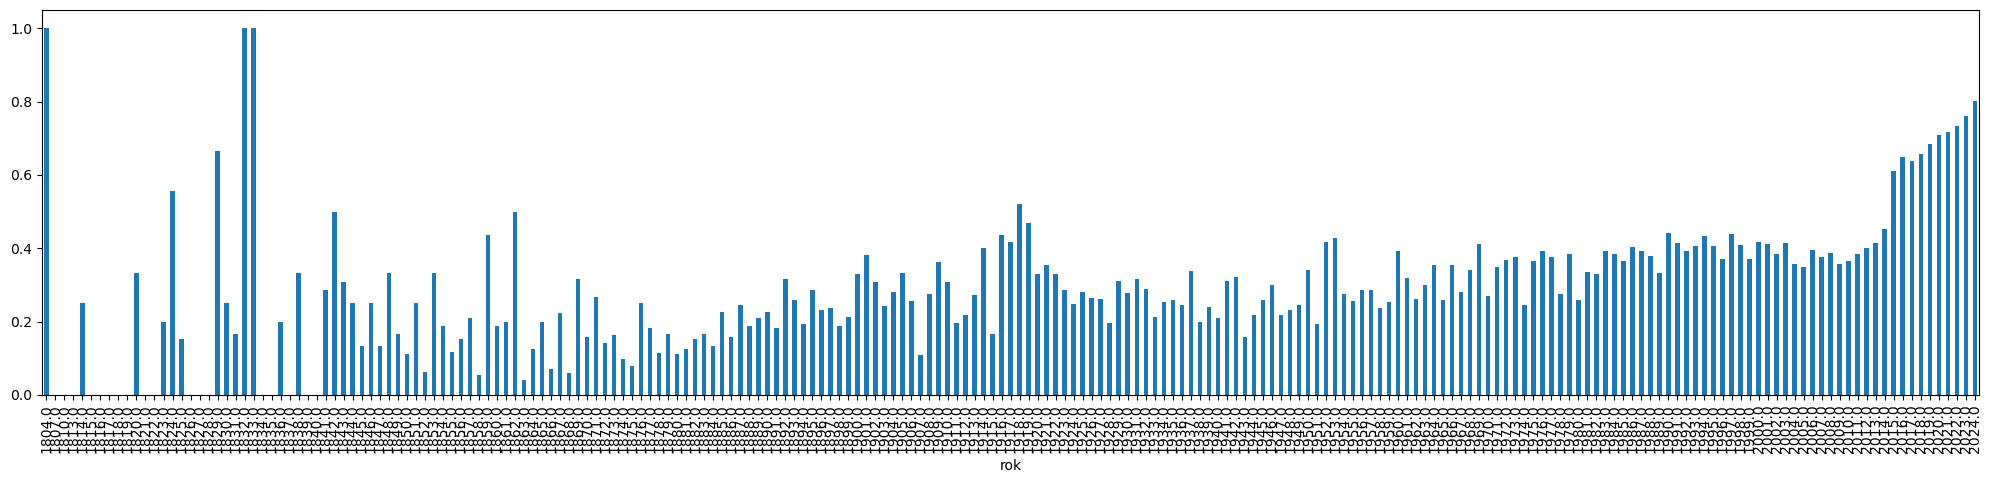

In [295]:
(df[df['gender'].isin(['m','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [296]:
df[(df['umrti'] < df['rok']) | (df['umrti'].isnull())].dropna(subset=['vek']).sort_values(by='vek',ascending=False)

,rok,titul,autorstvo,autorstvo_kod,100_7_x,024_2,024_a_x,046_f,046_g,100_7_y,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni_presne,w_umrti_presne,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,ceny,jazykove_verze,popis_cs,wiki_cs,wiki_en,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041415652,2004.0,Písnička od Zlatého potoka,Hejzlar František,mzk2004250847,NaN,None,None,[1876],None,[mzk2004250847],"[Hejzlar, František,]",[1876-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 9.1.1876 v Bystré u Nového Města n.Me...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.0,NaN,128.0,NaN
nkc20091963778,2009.0,Na Tepenci,Talášek Adolf,jk01132028,NaN,None,None,[1882],None,[jk01132028],"[Talášek, Adolf,]",[1882-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 23.11.1882 v Olomouci. Účetní, prozaik.]",None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882.0,NaN,127.0,NaN
nkc20183008369,2018.0,Hra na schovávanou s veselými štěňátky,Cresswell Ray,ola2003193634,NaN,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,Ray Cresswell,Ray Cresswell,illustrator,+1900-01-01T00:00:00Z,None,1900.0,NaN,Q6581097,None,None,None,[Q644687],None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,Q6581097
nkc20183008367,2018.0,Hra na schovávanou s kotětem a myšákem,Cresswell Ray,ola2003193634,NaN,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,Ray Cresswell,Ray Cresswell,illustrator,+1900-01-01T00:00:00Z,None,1900.0,NaN,Q6581097,None,None,None,[Q644687],None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,Q6581097
nkc20152684941,2015.0,Exekuce,Vávra Rudolf,jk01141755,NaN,None,None,[1905],None,[jk01141755],"[Vávra, Rudolf,]",[1905-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 14.4.1905 v Praze. Novinář, překladat...",None,nz a22 n 4500,Q95166542,Rudolf Vávra,Rudolf Vávra,None,+1905-04-14T00:00:00Z,None,1905.0,NaN,Q6581097,None,[Q1085],None,"[Q1930187, Q333634, Q36180]",None,[],"Narozen 14.4.1905 v Praze. Novinář, překladatel.",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1905.0,NaN,110.0,Q6581097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20172907907,1947.0,V táboře pod Malinovou horou,Lev František,xx0000991,NaN,None,None,[1948],None,[xx0000991],"[Lev, František,]",[1948-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.6.1948. Autor pověstí a l

In [297]:
df[df['vek'] > 110]

,rok,titul,autorstvo,autorstvo_kod,100_7_x,024_2,024_a_x,046_f,046_g,100_7_y,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni_presne,w_umrti_presne,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,ceny,jazykove_verze,popis_cs,wiki_cs,wiki_en,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041415652,2004.0,Písnička od Zlatého potoka,Hejzlar František,mzk2004250847,NaN,None,None,[1876],None,[mzk2004250847],"[Hejzlar, František,]",[1876-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 9.1.1876 v Bystré u Nového Města n.Me...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.0,NaN,128.0,NaN
nkc20091963778,2009.0,Na Tepenci,Talášek Adolf,jk01132028,NaN,None,None,[1882],None,[jk01132028],"[Talášek, Adolf,]",[1882-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 23.11.1882 v Olomouci. Účetní, prozaik.]",None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882.0,NaN,127.0,NaN
nkc20183008367,2018.0,Hra na schovávanou s kotětem a myšákem,Cresswell Ray,ola2003193634,NaN,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,Ray Cresswell,Ray Cresswell,illustrator,+1900-01-01T00:00:00Z,None,1900.0,NaN,Q6581097,None,None,None,[Q644687],None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,Q6581097
nkc20183008369,2018.0,Hra na schovávanou s veselými štěňátky,Cresswell Ray,ola2003193634,NaN,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,Ray Cresswell,Ray Cresswell,illustrator,+1900-01-01T00:00:00Z,None,1900.0,NaN,Q6581097,None,None,None,[Q644687],None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,Q6581097


## Explorace: věk

<Axes: xlabel='vek'>

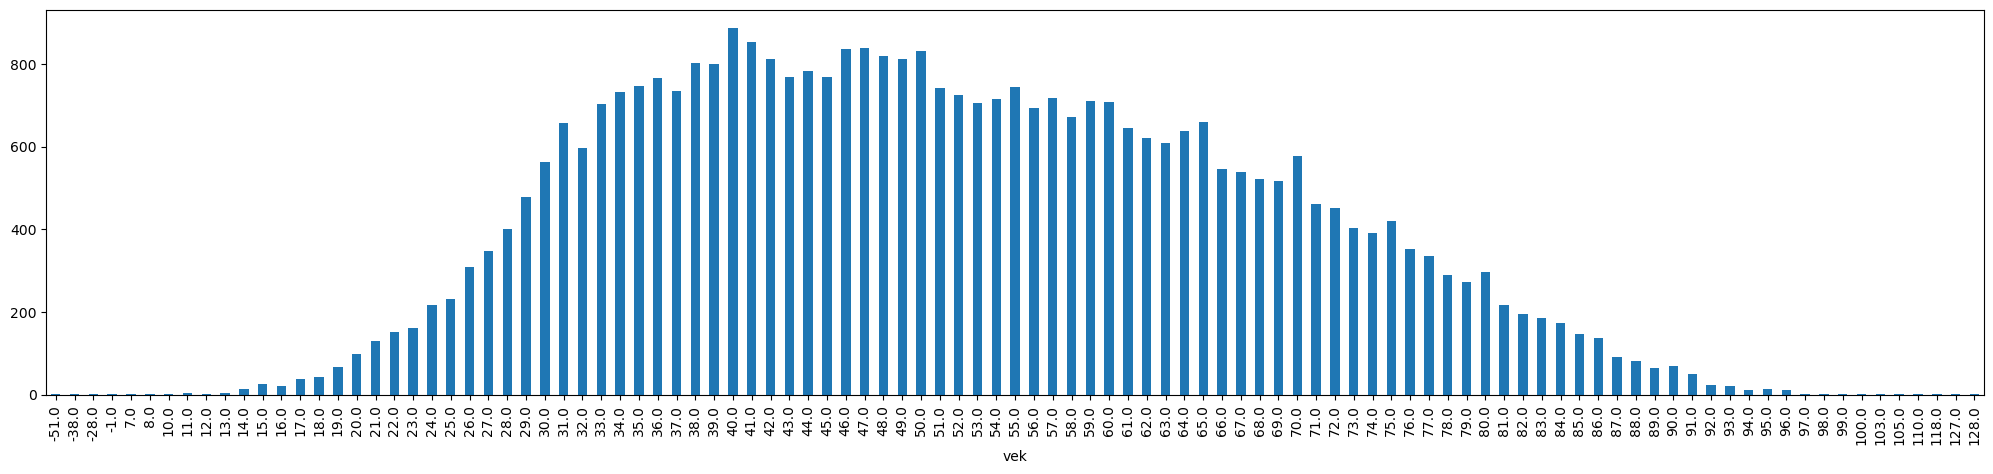

In [299]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].groupby('vek').size().plot.bar(figsize=(25,5))

In [300]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]['vek'].median()

50.0

<Axes: xlabel='vek'>

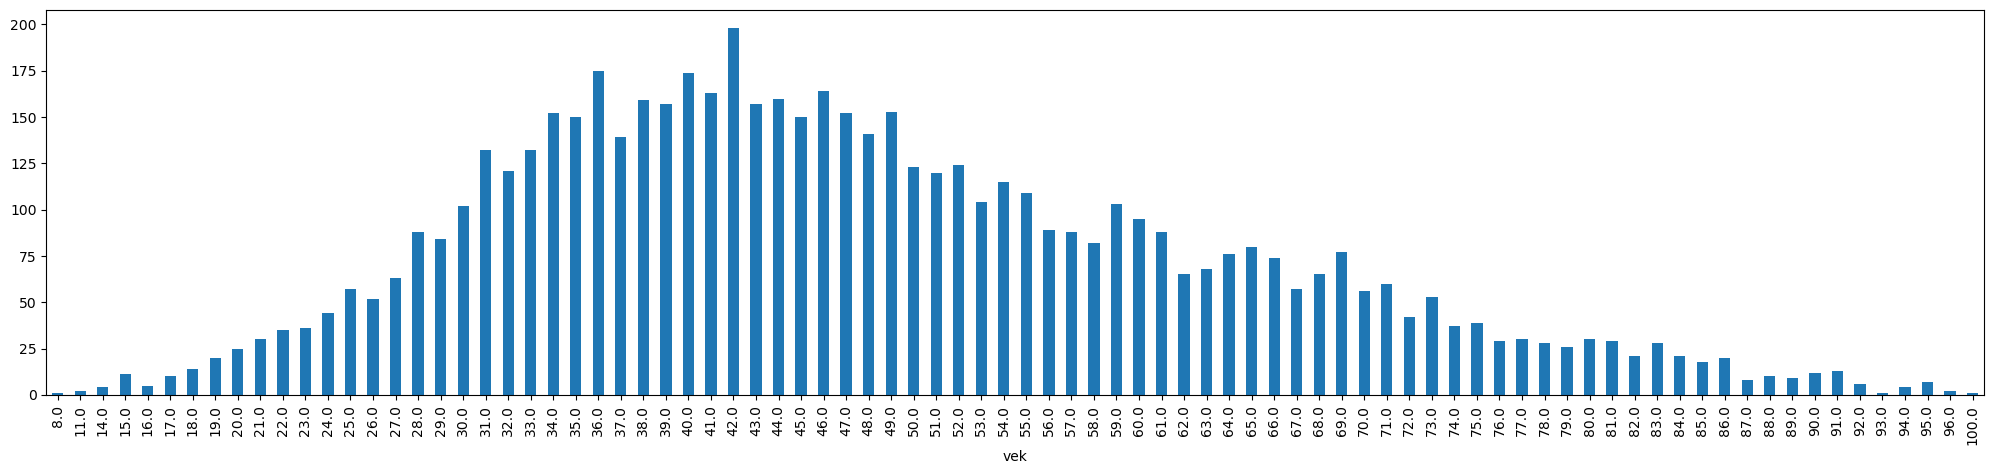

In [301]:
df[((df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())) & (df['gender'].isin(['f','á'])) ].groupby('vek').size().plot.bar(figsize=(25,5))

## Explorace: věk + gender

### Věky spisovatelstva publikujícího v posledních letech

In [304]:
df23 = df[df['rok'] >= 2019]

In [305]:
df23

,rok,titul,autorstvo,autorstvo_kod,100_7_x,024_2,024_a_x,046_f,046_g,100_7_y,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni_presne,w_umrti_presne,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,ceny,jazykove_verze,popis_cs,wiki_cs,wiki_en,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193160691,2019.0,Jak se pohádka přestala bát,Myslivcová Hana,jx20101021012,NaN,None,None,[1959],None,[jx20101021012],"[Myslivcová, Hana,]",[1959-],[1],None,None,None,[Česko],None,"[knihovnictví, autorská pohádka]",[Knihovna města Hradce Králové],[knihovnice],[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena v srpnu 1959. Bc., knihovnice, spolu...",None,cz a22 n 4500,Q112433384,Hana Myslivcová,Hana Myslivcová,None,+1959-08-00T00:00:00Z,None,1959.0,NaN,Q6581072,None,None,None,[Q182436],None,[],"Narozena v srpnu 1959. Bc., knihovnice, spolua...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1959.0,NaN,60.0,f
nkc20193161188,2019.0,Ztraceni v klobouku,Schreiber Hugo,mzk2006337122,NaN,None,None,[1943],None,[mzk2006337122],"[Schreiber, Hugo,]",[1943-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1943. Novinář, publicista, kronikář, ...",None,nz a22 n 4500,Q112398401,Hugo Schreiber,Hugo Schreiber,None,+1943-00-00T00:00:00Z,None,1943.0,NaN,Q6581097,None,None,None,"[Q1930187, Q6051619, Q3330547]",None,[],"Narozen 1943. Novinář, publicista, kronikář, t...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1943.0,NaN,76.0,Q6581097
nkc20193161189,2019.0,Otisky úsměvů,Pechová Jaroslava,jk01092345,NaN,None,None,[1950],None,[jk01092345],"[Pechová, Jaroslava,]",[1950-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 25.6.1950 v Petrovicích. Spisovatelk...,None,cz a22 n 4500,Q94253467,Jaroslava Pechová,Jaroslava Pechová,None,+1950-06-25T00:00:00Z,None,1950.0,NaN,Q6581072,None,[Q2080797],None,"[Q36180, Q6051619, Q49757, Q1930187]",None,[cs],česká spisovatelka,https://cs.wikipedia.org/wiki/Jaroslava_Pechov...,None,None,None,None,None,None,None,None,None,None,None,None,None,http://www.jaroslavapechova.cz/,None,None,1950.0,NaN,69.0,Q6581072
nkc20193160527,2019.0,Pohádka o ovečkách,Lukáš Ivo,jn20010309482,NaN,None,None,[1963],None,[jn20010309482],"[Lukáš, Ivo,]",[1963-],[1],None,None,None,[Česko],"[Brno, Česko]","[překladatelská činnost, vydavatelská činnost,...",[Barrister & Principal (nakladatelství)],"[nakladatelé a vydavatelé, překladatelé]",[muž],"[cze, eng, fre, ger]",None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 27. 7. 1963. Vydavatel. Překladatel z...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963.0,NaN,56.0,m
nkc20193160873,2019.0,Děda jménem Nuel,Čepelka Miloň,jk01021264,NaN,"[isni, wikidata]","[0000000055261647, Q12037533]",[1936],None,[jk01021264],"[Čepelka, Miloň,]",[1936-],[1],None,"[Pohoří, Rychnov nad Kněžnou, Česko]",None,[Česko],None,"[česká poezie, herectví, drama, divadlo]",None,"[básníci, herci, dramaturgové, scenáristé, dra...",[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 23.9.1936 v Pohoří u Opočna. Středošk...,[https://cs.wikipedia.org/wiki/Milo%C5%88_%C4%...,cz a22 n 4500,Q12037533,Miloň Čepelka,Miloň Čepelka,Czech poet and actor,+1936-09-23T00:00:00Z,None,1936.0,NaN,Q6581097,[Q213],[Q731086],None,"[Q36180, Q33999, Q4

In [306]:
len(df23[df23['narozeni'].notnull()]) / len(df23)

1.0

In [307]:
veky_muzu23 = df23[((df23['rok'] <= df23['umrti']) | (df23['narozeni'].notnull() & df23['umrti'].isnull())) & (df23['gender'].isin(['m','neá'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [308]:
veky_zen23 = df23[((df23['rok'] <= df23['umrti']) | (df23['narozeni'].notnull() & df23['umrti'].isnull())) & (df23['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

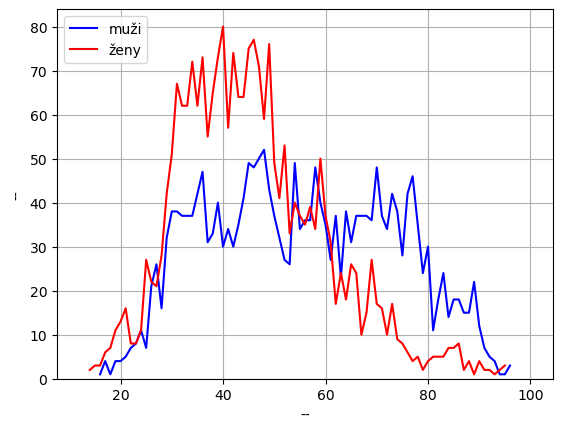

In [309]:
plt.plot(veky_muzu23, color="blue", label="muži")
plt.plot(veky_zen23, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

In [310]:
df23['vek'].median()

50.0

<Axes: xlabel='vek'>

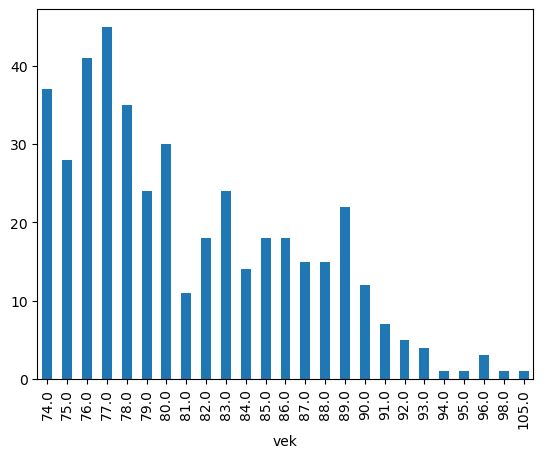

In [311]:
df23[(df23['gender'] == 'm') & (df23['vek'] > 73)].groupby('vek').size().plot.bar()

In [312]:
df23[(df23['gender'] == 'm') & (df23['vek'] == 77)]

,rok,titul,autorstvo,autorstvo_kod,100_7_x,024_2,024_a_x,046_f,046_g,100_7_y,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni_presne,w_umrti_presne,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,ceny,jazykove_verze,popis_cs,wiki_cs,wiki_en,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20203172271,2019.0,Horní hvozd,Kroutvor Josef,jn99240000542,NaN,None,None,[1942],None,[jn99240000542],"[Kroutvor, Josef,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, dějiny umění, výtvarné umění, ško...",None,"[spisovatelé, básníci, historici umění, kreslí...",[muž],[cze],"[Josef K.,]",[1942-],None,[0],None,None,None,None,None,None,None,None,[Narozen 30. 3. 1942 v Praze. Muzejní pracovní...,[https://cs.wikipedia.org/wiki/Josef_Kroutvor],cz a22 n 4500,Q12026289,Josef Kroutvor,Josef Kroutvor,Czech poet and essayist,+1942-03-30T00:00:00Z,None,1942.0,NaN,Q6581097,"[Q213, Q33946]",[Q1085],None,"[Q36180, Q49757, Q1792450, Q3391743, Q21550346...",[Q52796832],"[cs, de]",český básník a esejista,https://cs.wikipedia.org/wiki/Josef_Kroutvor,None,None,None,None,None,[Q31519],None,None,None,None,None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc20193163232,2019.0,Morytáty ze Žižkova,Slavíček Jiří,mzk2005295078,NaN,None,None,[1942],None,[mzk2005295078],"[Slavíček, Jiří,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, detektivní literatura, literatura...",None,[spisovatelé],[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30. 7. 1942 v Praze. Spisovatel, auto...",[https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_...,cz a22 n 4500,Q27869532,Jiří Slavíček,Jiří Slavíček,Czech writer,+1942-07-30T00:00:00Z,None,1942.0,NaN,Q6581097,"[Q33946, Q213]",[Q1085],None,[Q36180],None,[cs],český spisovatel,https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_S...,None,None,None,None,None,None,None,None,None,None,None,None,None,http://www.jiri-slavicek.cz,None,None,1942.0,NaN,77.0,m
nkc20193092331,2019.0,Poslední vandr na Zlaté řece,Slavíček Jiří,mzk2005295078,NaN,None,None,[1942],None,[mzk2005295078],"[Slavíček, Jiří,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, detektivní literatura, literatura...",None,[spisovatelé],[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30. 7. 1942 v Praze. Spisovatel, auto...",[https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_...,cz a22 n 4500,Q27869532,Jiří Slavíček,Jiří Slavíček,Czech writer,+1942-07-30T00:00:00Z,None,1942.0,NaN,Q6581097,"[Q33946, Q213]",[Q1085],None,[Q36180],None,[cs],český spisovatel,https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_S...,None,None,None,None,None,None,None,None,None,None,None,None,None,http://www.jiri-slavicek.cz,None,None,1942.0,NaN,77.0,m
nkc20193101029,2019.0,Lesní eseje,Kroutvor Josef,jn99240000542,NaN,None,None,[1942],None,[jn99240000542],"[Kroutvor, Josef,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, dějiny umění, výtvarné umění, ško...",None,"[spisovatelé, básníci, historici umění, kreslí...",[muž],[cze],"[Josef K.,]",[1942-],None,[0],None,None,None,None,None,None,None,None,[Narozen 30. 3. 1942 v Praze. Muzejní pracovní...,[https://cs.wikipedia.org/wiki/Josef_Kroutvor],cz a22 n 4500,Q12026289,Josef Kroutvor,Josef Kroutvor,Czech poet and essayist,+1942-03-30T00:00:00Z,None,1942.0,NaN,Q6581097,"[Q213, Q33946]",[Q1085],None,"[Q36180, Q49757, Q1792450, Q3391743, Q21550346...",[Q52796832],"[cs, de]",český básník a esejista,https://cs.wikipedia.org/wiki/Josef_Kroutvor,None,None,None,None,None,[Q31519],None,None,None,None,None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc201931160

### Věky spisovatelstva, které debutovalo v letech 1995-2005

In [314]:
debuty = df.groupby('autorstvo_kod')['rok'].min()

In [315]:
debutanstvo_x = debuty[debuty.isin([x for x in range(1995,2005)])].index.to_list()

In [316]:
davne_autorstvo = df[df['rok'] < 1980]['autorstvo_kod'].drop_duplicates().to_list()
df2 = df[~df['autorstvo_kod'].isin(davne_autorstvo)]

In [317]:
df2 = df[df['autorstvo_kod'].isin(debutanstvo_x)]

In [318]:
veky_muzu = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['m','neá'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [319]:
veky_zen = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

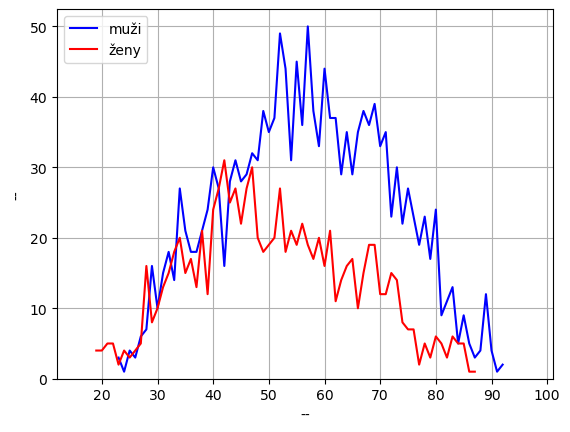

In [320]:
plt.plot(veky_muzu, color="blue", label="muži")
plt.plot(veky_zen, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

In [321]:
df.sort_values(by='vek').head(30)

,rok,titul,autorstvo,autorstvo_kod,100_7_x,024_2,024_a_x,046_f,046_g,100_7_y,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni_presne,w_umrti_presne,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,ceny,jazykove_verze,popis_cs,wiki_cs,wiki_en,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjms02100,1889.0,Z přírody,Doubek František,jk01022862,NaN,None,None,[1940],[2011],[jk01022862],"[Doubek, František,]",[1940-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 21. 4. 1940 v Milevsku, zemřel 11. 12...",None,cz a22 n 4500,Q95387632,František Doubek,František Doubek,"Czech graphic artist, painter and illustrator ...",+1940-04-21T00:00:00Z,+2011-12-11T00:00:00Z,1940.0,2011.0,Q6581097,None,[Q1015011],[Q158245],"[Q37226, Q1028181, Q644687, Q1925963]",None,[cs],"český grafik, učitel, malíř a ilustrátor",https://cs.wikipedia.org/wiki/Franti%C5%A1ek_D...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1940.0,2011.0,-51.0,Q6581097
bk192805257,1928.0,Cesta osudu,Ledecký Vladimír,jx20080917017,NaN,None,None,None,None,[jx20080917017],"[Ledecký, Vladimír]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletrista, autor románu Cesta osudu, Zničený...",None,cz a22 n 4500,Q104778546,Vladimír Ledecký,Vladimír Ledecký,Slovak politician,+1966-02-14T00:00:00Z,None,1966.0,NaN,Q6581097,[Q214],[Q242478],None,[Q82955],None,"[en, sk]",slovenský politik,None,https://en.wikipedia.org/wiki/Vladim%C3%ADr_Le...,None,None,None,[Q64729826],[Q9366812],None,None,[Q101421294],None,None,None,None,None,None,None,1966.0,NaN,-38.0,Q6581097
nkc20081819672,1928.0,Zničený život,Ledecký Vladimír,jx20080917017,NaN,None,None,None,None,[jx20080917017],"[Ledecký, Vladimír]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletrista, autor románu Cesta osudu, Zničený...",None,cz a22 n 4500,Q104778546,Vladimír Ledecký,Vladimír Ledecký,Slovak politician,+1966-02-14T00:00:00Z,None,1966.0,NaN,Q6581097,[Q214],[Q242478],None,[Q82955],None,"[en, sk]",slovenský politik,None,https://en.wikipedia.org/wiki/Vladim%C3%ADr_Le...,None,None,None,[Q64729826],[Q9366812],None,None,[Q101421294],None,None,None,None,None,None,None,1966.0,NaN,-38.0,Q6581097
bknhra07814,1928.0,Na zapřenou,Sedláčková Anna,mzk2005274887,NaN,None,None,[1956],None,[mzk2005274887],"[Sedláčková, Anna,]",[1956-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 1956. Ing., knihovnice, autorka bibl...",None,nz a22 n 4500,Q112390437,Anna Sedláčková,None,None,+1956-00-00T00:00:00Z,None,1956.0,NaN,Q6581072,None,None,None,[Q182436],None,[],"Narozena 1956. Ing., knihovnice, autorka bibli...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1956.0,NaN,-28.0,Q6581072
bk197201252,1972.0,V hudbě život,Kadlecová Marie Magdalena,jk01052463,NaN,"[isni, wikidata]","[0000000055603432, Q15928217]",None,None,[jk01052463],"[Kadlecová, Marie Magdalena]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletristka, autorka knih pro děti a biografi...",None,cz a22 n 4500,Q15928217,Marie Magdalena Kadlecová,Marie Magdalena Kadlecová,Czech writer,+2000-00-00T00:00:00Z,None,2000.0,NaN,Q6581072,[Q213],None,None,[Q36180],None,[cs],česká spisovatelka,https://cs.wikipedia.org/wiki/Marie_Magdalena_...,None,Non

In [322]:
df.groupby('autorstvo')['autorstvo_kod'].nunique().nlargest()

autorstvo
Svoboda Jiří        5
Novák Jaroslav      4
Černý Karel         4
Švarc Václav        4
Dvořáková Helena    3
Name: autorstvo_kod, dtype: int64

In [323]:
len(df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())])

37177